# **ASSIGNMENT 3**

# **1. Importing Packages and loading the dataset**

In [6]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Convolution2D,MaxPooling2D,Flatten,Dense
from tensorflow.keras.preprocessing.image import ImageDataGenerator as idm
from keras.preprocessing import image
import numpy as np
from tensorflow.keras.preprocessing import image
from google.colab import files
import zipfile
import io

In [1]:
uploaded = files.upload()

Saving Flowers-Dataset.zip to Flowers-Dataset.zip


In [3]:
zf = zipfile.ZipFile(io.BytesIO(uploaded['Flowers-Dataset.zip']), "r")
zf.extractall()

In [8]:
# Creating augmentation on training variable
train_flowers=idm(rescale=1./255,zoom_range=0.2,horizontal_flip=True)

# Passing training data to train variable
Xtrain = train_flowers.flow_from_directory('/content/flowers',target_size=(76,76),class_mode='categorical',batch_size=100)

Found 4317 images belonging to 5 classes.


In [9]:
# Creating augmentation on testing variable
test_flowers=idm(rescale=1./255)

# Passing testing data to test variable
Xtest = test_flowers.flow_from_directory('/content/flowers',target_size=(76,76),class_mode='categorical',batch_size=100)

Found 4317 images belonging to 5 classes.


# **3 & 4. Creating Model and Adding layers**

In [10]:
Flower_model = Sequential()
Flower_model.add(Convolution2D(32,(3,3),activation='relu',input_shape=(76,76,3)))
Flower_model.add(MaxPooling2D(pool_size=(2,2)))
Flower_model.add(Flatten())
Flower_model.add(Dense(300,activation='relu'))
Flower_model.add(Dense(150,activation='relu'))
Flower_model.add(Dense(5,activation='softmax'))

# **5. Compiling the model**

In [11]:
Flower_model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

# **6. Fit the Model**

In [12]:
Flower_model.fit_generator(Xtrain,steps_per_epoch= len (Xtrain),epochs= 10,validation_data=Xtest,validation_steps= len (Xtest))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  """Entry point for launching an IPython kernel.


Epoch 1/10
44/44 [==============================] - 56s 1s/step - loss: 1.8901 - accuracy: 0.3625 - val_loss: 1.1503 - val_accuracy: 0.5277
Epoch 2/10
44/44 [==============================] - 58s 1s/step - loss: 1.1019 - accuracy: 0.5731 - val_loss: 1.0739 - val_accuracy: 0.5879
Epoch 3/10
44/44 [==============================] - 56s 1s/step - loss: 1.0107 - accuracy: 0.6120 - val_loss: 0.9866 - val_accuracy: 0.6180
Epoch 4/10
44/44 [==============================] - 58s 1s/step - loss: 0.9411 - accuracy: 0.6419 - val_loss: 0.8832 - val_accuracy: 0.6725
Epoch 5/10
44/44 [==============================] - 56s 1s/step - loss: 0.9041 - accuracy: 0.6514 - val_loss: 0.8810 - val_accuracy: 0.6829
Epoch 6/10
44/44 [==============================] - 57s 1s/step - loss: 0.8386 - accuracy: 0.6833 - val_loss: 0.7748 - val_accuracy: 0.7135
Epoch 7/10
44/44 [==============================] - 55s 1s/step - loss: 0.7929 - accuracy: 0.6986 - val_loss: 0.7836 - val_accuracy: 0.7023
Epoch 8/10
44/44 [==

# **7. Save the model**

In [13]:
Flower_model.save('Flower.h5')

# **8. Test the model**

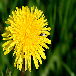

In [14]:
test1=image.load_img('/content/flowers/dandelion/138166590_47c6cb9dd0.jpg',target_size=(76,76))
test1

In [15]:
x=image.img_to_array(test1)
x=np.expand_dims(x,axis=0)
predicted=np.argmax(Flower_model.predict(x))
Prediction_category=['daisy','dandelion','rose','sunflower','tulip']
Prediction_category[predicted]

1/1 [==============================] - 0s 129ms/step


'dandelion'

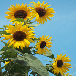

In [16]:
test2=image.load_img('/content/flowers/sunflower/14121915990_4b76718077_m.jpg',target_size=(76,76))
test2

In [17]:
y = image.img_to_array(test2)
y = np.expand_dims(y,axis=0)
predicted = np.argmax(Flower_model.predict(y))
Prediction_category = ['daisy','dandelion','rose','sunflower','tulip']
Prediction_category[predicted]

1/1 [==============================] - 0s 26ms/step


'sunflower'